In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
pd.read_csv??

In [4]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


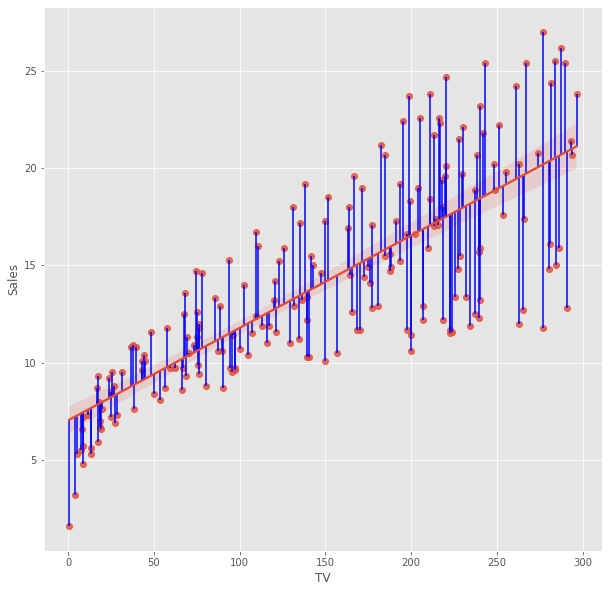

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
fit = np.polyfit(df['TV'], df['Sales'], deg=1)
y_hat = df['TV'] * fit[0] + fit[1]
a = sns.regplot(x='TV', y='Sales', data=df)
plt.vlines(df['TV'], y_hat, df['Sales'], color='b')


In [6]:
fit = np.polyfit(df['TV'], df['Sales'], deg=1)

In [7]:
fit

array([0.04753664, 7.03259355])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()
reg.fit(df['TV'].values, df['Sales'].values)
reg.intercept_

ValueError: Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 117.2 234.5  17.9 206.8
 215.4 284.3  50.  164.5  19.6 168.4 222.4 276.9 248.4 170.2 276.7 165.6
 156.6 218.5  56.2 287.6 253.8 205.  139.5 191.1 286.   18.7  39.5  75.5
  17.2 166.8 149.7  38.2  94.2 177.  283.6 232.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
b0 = np.linspace(5, 9, 50)
b1 = np.linspace(0.03, 0.07, 50)

In [ ]:
B0, B1 = np.meshgrid(b0, b1)

In [ ]:
b0

In [ ]:
b1

In [ ]:
errors = np.array([np.mean((df['Sales'].values - (b_1 * df['TV'].values + b_0))**2) for b_1 in b1 for b_0 in b0])

In [ ]:
errors = errors.reshape(B0.shape)

In [ ]:
cs = plt.contour(B0, B1, errors, levels=[10, 22, 32, 41])
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter(fit[1], fit[0])

In [ ]:
b0 = np.linspace(5, 9, 50)
b1 = np.linspace(.03, .07, 50)
errors = np.array([np.mean((df['Sales'].values - (b_0 + b_1 * df['TV'].values)) ** 2) for b_1 in b1 for b_0 in b0])
B0, B1 = np.meshgrid(b0, b1)
errors_mesh = errors.reshape(B0.shape)
cmap = plt.cm.RdYlBu
plt.figure(figsize=(8,6))
cs = plt.contour(B0, B1, errors_mesh, cmap=cmap, levels=[10.6, 11, 13, 15])
manual_locations = [(7, .05)]
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter(fit[1], fit[0]);

In [ ]:
errors_mesh.max()

In [ ]:
errors.max()

NameError: name 'fit' is not defined

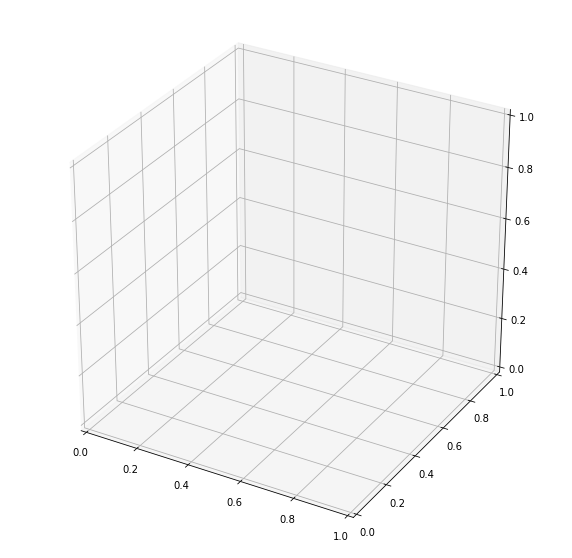

In [13]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d')
ax.scatter3D(fit[1], fit[0],  errors.min(), s=100, c='red')
ax.plot_wireframe(B0, B1, errors, color='pink', alpha=0.5)

In [ ]:
from scipy.special import comb
probs = [comb(100, i) * .5 ** 100 for i in range(41, 60)]

In [10]:
((np.random.rand(1000,100) > .5).mean(1) >= .6).mean()


0.021

In [11]:
 comb(100, 41) * .5   - (1 * (10**28))

NameError: name 'comb' is not defined

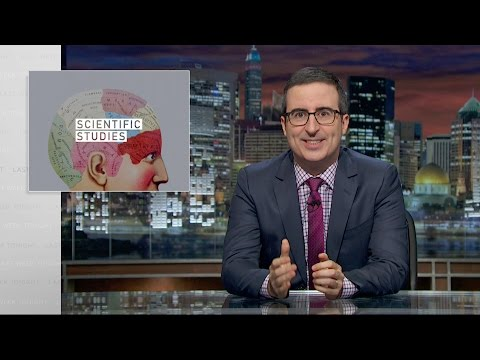

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo("0Rnq1NpHdmw", width=800, height=600)

In [13]:
float(1.05e+28) - (1.005822010668498e+28)

4.417798933150198e+26

In [14]:
comb(100, 41) * .5

NameError: name 'comb' is not defined

In [ ]:
df

In [ ]:
plt.style.use('ggplot')

In [ ]:
np.polyfit??

In [ ]:
fit = np.polyfit(df['TV'], df['Sales'], deg=1)

In [ ]:
fit

In [15]:
[df['Sales'].mean()] * len(df['TV'])

[14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,
 14.0225,


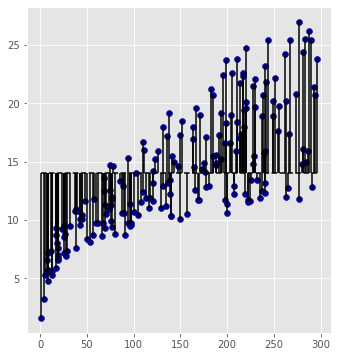

In [16]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
ax.scatter(df['TV'], df['Sales'], marker='o', c='darkblue')
ax.hlines(df['Sales'].mean(), df['TV'].min(), df['TV'].max(), linestyle='--')
ax.vlines(df['TV'], df['Sales'].mean(), df['Sales'])
# ax.plot(df['TV'], [df['Sales'].mean()] * len(df['TV']), linestyle='--')

In [17]:
fit

array([0.04753664, 7.03259355])

In [18]:
df['TV']*fit[1]+fit[0]

1      1618.247312
2       312.997950
3       121.008146
4      1065.485459
5      1271.540450
          ...     
196     268.692610
197     662.517849
198    1244.816595
199    1994.491067
200    1632.312499
Name: TV, Length: 200, dtype: float64

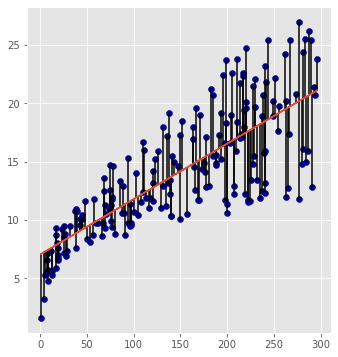

In [19]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(122)
ax.scatter(df['TV'], df['Sales'], marker='o', c='darkblue')
ax.plot(df['TV'], df['TV']*fit[0]+fit[1])
ax.vlines(df['TV'], df['Sales'], df['TV']*fit[0]+fit[1])

In [20]:
errors_mean = abs(df['Sales'] - df['Sales'].mean())

In [21]:
error_model = abs(df['Sales'] - (df['TV']*fit[0]+fit[1]))

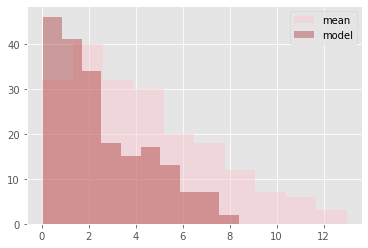

In [22]:
plt.hist(errors_mean, color='pink', alpha=0.4, label='mean')
plt.hist(error_model, color='brown', alpha=0.4, label='model')
plt.legend()

In [23]:
(errors_mean > error_model).mean()

0.715

## Multi Linear Regression

In [24]:
result = smf.ols('Sales ~ TV', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        00:31:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
result = smf.ols('Sales ~ Newspaper', data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [26]:
result = smf.ols('Sales ~ TV + Newspaper + Radio', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        00:31:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [35]:
smf.ols('Sales ~ TV + Radio+Newspaper', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        00:34:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X = df.loc[:, ['Radio', 'TV']].values
y = df.Sales
regr = LinearRegression()

regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
B22.shape

(300, 50)

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.


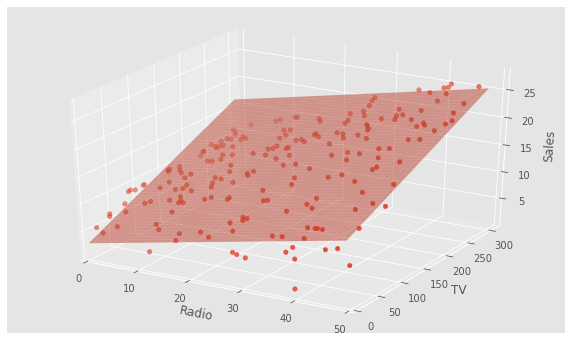

In [106]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='3d')
Radio = np.arange(50)
TV = np.arange(300)
B11, B22 = np.meshgrid(Radio, TV, indexing='xy')
ZZ = np.zeros((TV.size, Radio.size))
for (i,j),v in np.ndenumerate(ZZ):
    ZZ[i,j] =(regr.intercept_ + B11[i,j]*regr.coef_[0] + B22[i,j]*regr.coef_[1])
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax.plot_surface(B1, B2, Z
                , alpha=0.5)
ax.scatter3D(df.Radio, df.TV, df.Sales)

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

(300, 50)
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 

33 7
33 8
33 9
33 10
33 11
33 12
33 13
33 14
33 15
33 16
33 17
33 18
33 19
33 20
33 21
33 22
33 23
33 24
33 25
33 26
33 27
33 28
33 29
33 30
33 31
33 32
33 33
33 34
33 35
33 36
33 37
33 38
33 39
33 40
33 41
33 42
33 43
33 44
33 45
33 46
33 47
33 48
33 49
34 0
34 1
34 2
34 3
34 4
34 5
34 6
34 7
34 8
34 9
34 10
34 11
34 12
34 13
34 14
34 15
34 16
34 17
34 18
34 19
34 20
34 21
34 22
34 23
34 24
34 25
34 26
34 27
34 28
34 29
34 30
34 31
34 32
34 33
34 34
34 35
34 36
34 37
34 38
34 39
34 40
34 41
34 42
34 43
34 44
34 45
34 46
34 47
34 48
34 49
35 0
35 1
35 2
35 3
35 4
35 5
35 6
35 7
35 8
35 9
35 10
35 11
35 12
35 13
35 14
35 15
35 16
35 17
35 18
35 19
35 20
35 21
35 22
35 23
35 24
35 25
35 26
35 27
35 28
35 29
35 30
35 31
35 32
35 33
35 34
35 35
35 36
35 37
35 38
35 39
35 40
35 41
35 42
35 43
35 44
35 45
35 46
35 47
35 48
35 49
36 0
36 1
36 2
36 3
36 4
36 5
36 6
36 7
36 8
36 9
36 10
36 11
36 12
36 13
36 14
36 15
36 16
36 17
36 18
36 19
36 20
36 21
36 22
36 23
36 24
36 25
36 26
36 27
36 28
3

68 7
68 8
68 9
68 10
68 11
68 12
68 13
68 14
68 15
68 16
68 17
68 18
68 19
68 20
68 21
68 22
68 23
68 24
68 25
68 26
68 27
68 28
68 29
68 30
68 31
68 32
68 33
68 34
68 35
68 36
68 37
68 38
68 39
68 40
68 41
68 42
68 43
68 44
68 45
68 46
68 47
68 48
68 49
69 0
69 1
69 2
69 3
69 4
69 5
69 6
69 7
69 8
69 9
69 10
69 11
69 12
69 13
69 14
69 15
69 16
69 17
69 18
69 19
69 20
69 21
69 22
69 23
69 24
69 25
69 26
69 27
69 28
69 29
69 30
69 31
69 32
69 33
69 34
69 35
69 36
69 37
69 38
69 39
69 40
69 41
69 42
69 43
69 44
69 45
69 46
69 47
69 48
69 49
70 0
70 1
70 2
70 3
70 4
70 5
70 6
70 7
70 8
70 9
70 10
70 11
70 12
70 13
70 14
70 15
70 16
70 17
70 18
70 19
70 20
70 21
70 22
70 23
70 24
70 25
70 26
70 27
70 28
70 29
70 30
70 31
70 32
70 33
70 34
70 35
70 36
70 37
70 38
70 39
70 40
70 41
70 42
70 43
70 44
70 45
70 46
70 47
70 48
70 49
71 0
71 1
71 2
71 3
71 4
71 5
71 6
71 7
71 8
71 9
71 10
71 11
71 12
71 13
71 14
71 15
71 16
71 17
71 18
71 19
71 20
71 21
71 22
71 23
71 24
71 25
71 26
71 27
71 28
7

103 7
103 8
103 9
103 10
103 11
103 12
103 13
103 14
103 15
103 16
103 17
103 18
103 19
103 20
103 21
103 22
103 23
103 24
103 25
103 26
103 27
103 28
103 29
103 30
103 31
103 32
103 33
103 34
103 35
103 36
103 37
103 38
103 39
103 40
103 41
103 42
103 43
103 44
103 45
103 46
103 47
103 48
103 49
104 0
104 1
104 2
104 3
104 4
104 5
104 6
104 7
104 8
104 9
104 10
104 11
104 12
104 13
104 14
104 15
104 16
104 17
104 18
104 19
104 20
104 21
104 22
104 23
104 24
104 25
104 26
104 27
104 28
104 29
104 30
104 31
104 32
104 33
104 34
104 35
104 36
104 37
104 38
104 39
104 40
104 41
104 42
104 43
104 44
104 45
104 46
104 47
104 48
104 49
105 0
105 1
105 2
105 3
105 4
105 5
105 6
105 7
105 8
105 9
105 10
105 11
105 12
105 13
105 14
105 15
105 16
105 17
105 18
105 19
105 20
105 21
105 22
105 23
105 24
105 25
105 26
105 27
105 28
105 29
105 30
105 31
105 32
105 33
105 34
105 35
105 36
105 37
105 38
105 39
105 40
105 41
105 42
105 43
105 44
105 45
105 46
105 47
105 48
105 49
106 0
106 1
106 2
106 

138 7
138 8
138 9
138 10
138 11
138 12
138 13
138 14
138 15
138 16
138 17
138 18
138 19
138 20
138 21
138 22
138 23
138 24
138 25
138 26
138 27
138 28
138 29
138 30
138 31
138 32
138 33
138 34
138 35
138 36
138 37
138 38
138 39
138 40
138 41
138 42
138 43
138 44
138 45
138 46
138 47
138 48
138 49
139 0
139 1
139 2
139 3
139 4
139 5
139 6
139 7
139 8
139 9
139 10
139 11
139 12
139 13
139 14
139 15
139 16
139 17
139 18
139 19
139 20
139 21
139 22
139 23
139 24
139 25
139 26
139 27
139 28
139 29
139 30
139 31
139 32
139 33
139 34
139 35
139 36
139 37
139 38
139 39
139 40
139 41
139 42
139 43
139 44
139 45
139 46
139 47
139 48
139 49
140 0
140 1
140 2
140 3
140 4
140 5
140 6
140 7
140 8
140 9
140 10
140 11
140 12
140 13
140 14
140 15
140 16
140 17
140 18
140 19
140 20
140 21
140 22
140 23
140 24
140 25
140 26
140 27
140 28
140 29
140 30
140 31
140 32
140 33
140 34
140 35
140 36
140 37
140 38
140 39
140 40
140 41
140 42
140 43
140 44
140 45
140 46
140 47
140 48
140 49
141 0
141 1
141 2
141 

176 42
176 43
176 44
176 45
176 46
176 47
176 48
176 49
177 0
177 1
177 2
177 3
177 4
177 5
177 6
177 7
177 8
177 9
177 10
177 11
177 12
177 13
177 14
177 15
177 16
177 17
177 18
177 19
177 20
177 21
177 22
177 23
177 24
177 25
177 26
177 27
177 28
177 29
177 30
177 31
177 32
177 33
177 34
177 35
177 36
177 37
177 38
177 39
177 40
177 41
177 42
177 43
177 44
177 45
177 46
177 47
177 48
177 49
178 0
178 1
178 2
178 3
178 4
178 5
178 6
178 7
178 8
178 9
178 10
178 11
178 12
178 13
178 14
178 15
178 16
178 17
178 18
178 19
178 20
178 21
178 22
178 23
178 24
178 25
178 26
178 27
178 28
178 29
178 30
178 31
178 32
178 33
178 34
178 35
178 36
178 37
178 38
178 39
178 40
178 41
178 42
178 43
178 44
178 45
178 46
178 47
178 48
178 49
179 0
179 1
179 2
179 3
179 4
179 5
179 6
179 7
179 8
179 9
179 10
179 11
179 12
179 13
179 14
179 15
179 16
179 17
179 18
179 19
179 20
179 21
179 22
179 23
179 24
179 25
179 26
179 27
179 28
179 29
179 30
179 31
179 32
179 33
179 34
179 35
179 36
179 37
179 38
1

213 6
213 7
213 8
213 9
213 10
213 11
213 12
213 13
213 14
213 15
213 16
213 17
213 18
213 19
213 20
213 21
213 22
213 23
213 24
213 25
213 26
213 27
213 28
213 29
213 30
213 31
213 32
213 33
213 34
213 35
213 36
213 37
213 38
213 39
213 40
213 41
213 42
213 43
213 44
213 45
213 46
213 47
213 48
213 49
214 0
214 1
214 2
214 3
214 4
214 5
214 6
214 7
214 8
214 9
214 10
214 11
214 12
214 13
214 14
214 15
214 16
214 17
214 18
214 19
214 20
214 21
214 22
214 23
214 24
214 25
214 26
214 27
214 28
214 29
214 30
214 31
214 32
214 33
214 34
214 35
214 36
214 37
214 38
214 39
214 40
214 41
214 42
214 43
214 44
214 45
214 46
214 47
214 48
214 49
215 0
215 1
215 2
215 3
215 4
215 5
215 6
215 7
215 8
215 9
215 10
215 11
215 12
215 13
215 14
215 15
215 16
215 17
215 18
215 19
215 20
215 21
215 22
215 23
215 24
215 25
215 26
215 27
215 28
215 29
215 30
215 31
215 32
215 33
215 34
215 35
215 36
215 37
215 38
215 39
215 40
215 41
215 42
215 43
215 44
215 45
215 46
215 47
215 48
215 49
216 0
216 1
216 

248 47
248 48
248 49
249 0
249 1
249 2
249 3
249 4
249 5
249 6
249 7
249 8
249 9
249 10
249 11
249 12
249 13
249 14
249 15
249 16
249 17
249 18
249 19
249 20
249 21
249 22
249 23
249 24
249 25
249 26
249 27
249 28
249 29
249 30
249 31
249 32
249 33
249 34
249 35
249 36
249 37
249 38
249 39
249 40
249 41
249 42
249 43
249 44
249 45
249 46
249 47
249 48
249 49
250 0
250 1
250 2
250 3
250 4
250 5
250 6
250 7
250 8
250 9
250 10
250 11
250 12
250 13
250 14
250 15
250 16
250 17
250 18
250 19
250 20
250 21
250 22
250 23
250 24
250 25
250 26
250 27
250 28
250 29
250 30
250 31
250 32
250 33
250 34
250 35
250 36
250 37
250 38
250 39
250 40
250 41
250 42
250 43
250 44
250 45
250 46
250 47
250 48
250 49
251 0
251 1
251 2
251 3
251 4
251 5
251 6
251 7
251 8
251 9
251 10
251 11
251 12
251 13
251 14
251 15
251 16
251 17
251 18
251 19
251 20
251 21
251 22
251 23
251 24
251 25
251 26
251 27
251 28
251 29
251 30
251 31
251 32
251 33
251 34
251 35
251 36
251 37
251 38
251 39
251 40
251 41
251 42
251 43
2

288 6
288 7
288 8
288 9
288 10
288 11
288 12
288 13
288 14
288 15
288 16
288 17
288 18
288 19
288 20
288 21
288 22
288 23
288 24
288 25
288 26
288 27
288 28
288 29
288 30
288 31
288 32
288 33
288 34
288 35
288 36
288 37
288 38
288 39
288 40
288 41
288 42
288 43
288 44
288 45
288 46
288 47
288 48
288 49
289 0
289 1
289 2
289 3
289 4
289 5
289 6
289 7
289 8
289 9
289 10
289 11
289 12
289 13
289 14
289 15
289 16
289 17
289 18
289 19
289 20
289 21
289 22
289 23
289 24
289 25
289 26
289 27
289 28
289 29
289 30
289 31
289 32
289 33
289 34
289 35
289 36
289 37
289 38
289 39
289 40
289 41
289 42
289 43
289 44
289 45
289 46
289 47
289 48
289 49
290 0
290 1
290 2
290 3
290 4
290 5
290 6
290 7
290 8
290 9
290 10
290 11
290 12
290 13
290 14
290 15
290 16
290 17
290 18
290 19
290 20
290 21
290 22
290 23
290 24
290 25
290 26
290 27
290 28
290 29
290 30
290 31
290 32
290 33
290 34
290 35
290 36
290 37
290 38
290 39
290 40
290 41
290 42
290 43
290 44
290 45
290 46
290 47
290 48
290 49
291 0
291 1
291 

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.


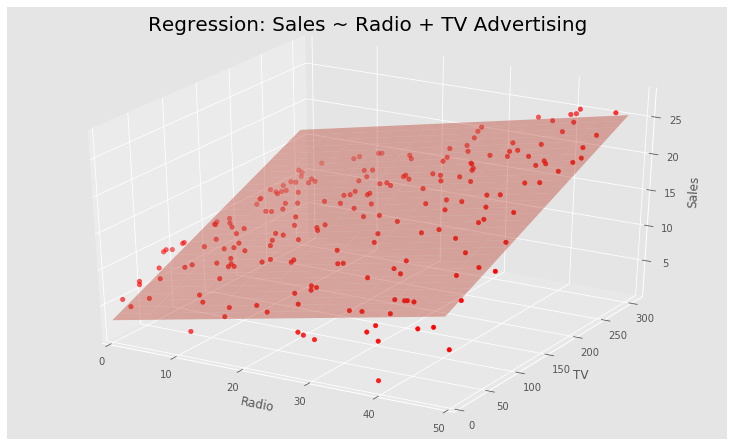

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
advertising = df.copy()
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))
print(Z.shape)
for (i,j),v in np.ndenumerate(Z):
    print(i, j)
    Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

In [79]:
B11

array([[ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       ...,
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49]])

In [80]:
B1

array([[ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       ...,
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49]])

In [110]:
B11

array([[ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       ...,
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49],
       [ 0,  1,  2, ..., 47, 48, 49]])

In [111]:
B22

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [297, 297, 297, ..., 297, 297, 297],
       [298, 298, 298, ..., 298, 298, 298],
       [299, 299, 299, ..., 299, 299, 299]])

In [112]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [43]:
df = pd.read_csv('Advertising.csv', index_col=0)

In [44]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [86]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = df.loc[:, ['TV', 'Radio']].values
y = df.Sales.values
lin_reg.fit(X, y)

tv_range = np.linspace(np.floor(df.TV.min()), np.ceil(df.TV.max()))
radio = np.linspace(np.floor(df.Radio.min()), np.ceil(df.Radio.max()))

XX, YY = np.meshgrid(tv_range, radio)
ZZ = lin_reg.coef_[0] * XX + lin_reg.coef_[1] * YY + lin_reg.intercept_


C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  app.launch_new_instance()


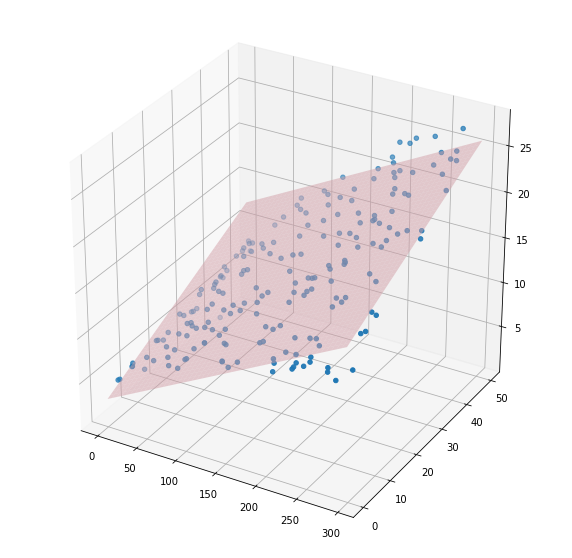

In [88]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ, color='pink', alpha=.5)
ax.scatter3D(df.TV, df.Radio, df.Sales)


In [76]:
import seaborn as sns

array([[ 2.92109991,  3.19843012,  3.47576032, ..., 15.95561959,
        16.23294979, 16.51028   ],
       [ 3.11293076,  3.39026096,  3.66759117, ..., 16.14745043,
        16.42478064, 16.70211084],
       [ 3.3047616 ,  3.58209181,  3.85942201, ..., 16.33928127,
        16.61661148, 16.89394168],
       ...,
       [11.93714956, 12.21447976, 12.49180997, ..., 24.97166923,
        25.24899944, 25.52632964],
       [12.1289804 , 12.40631061, 12.68364081, ..., 25.16350007,
        25.44083028, 25.71816048],
       [12.32081124, 12.59814145, 12.87547166, ..., 25.35533092,
        25.63266112, 25.90999133]])

In [112]:
credit_DF = pd.read_csv('Credit.csv')
credit_DF

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


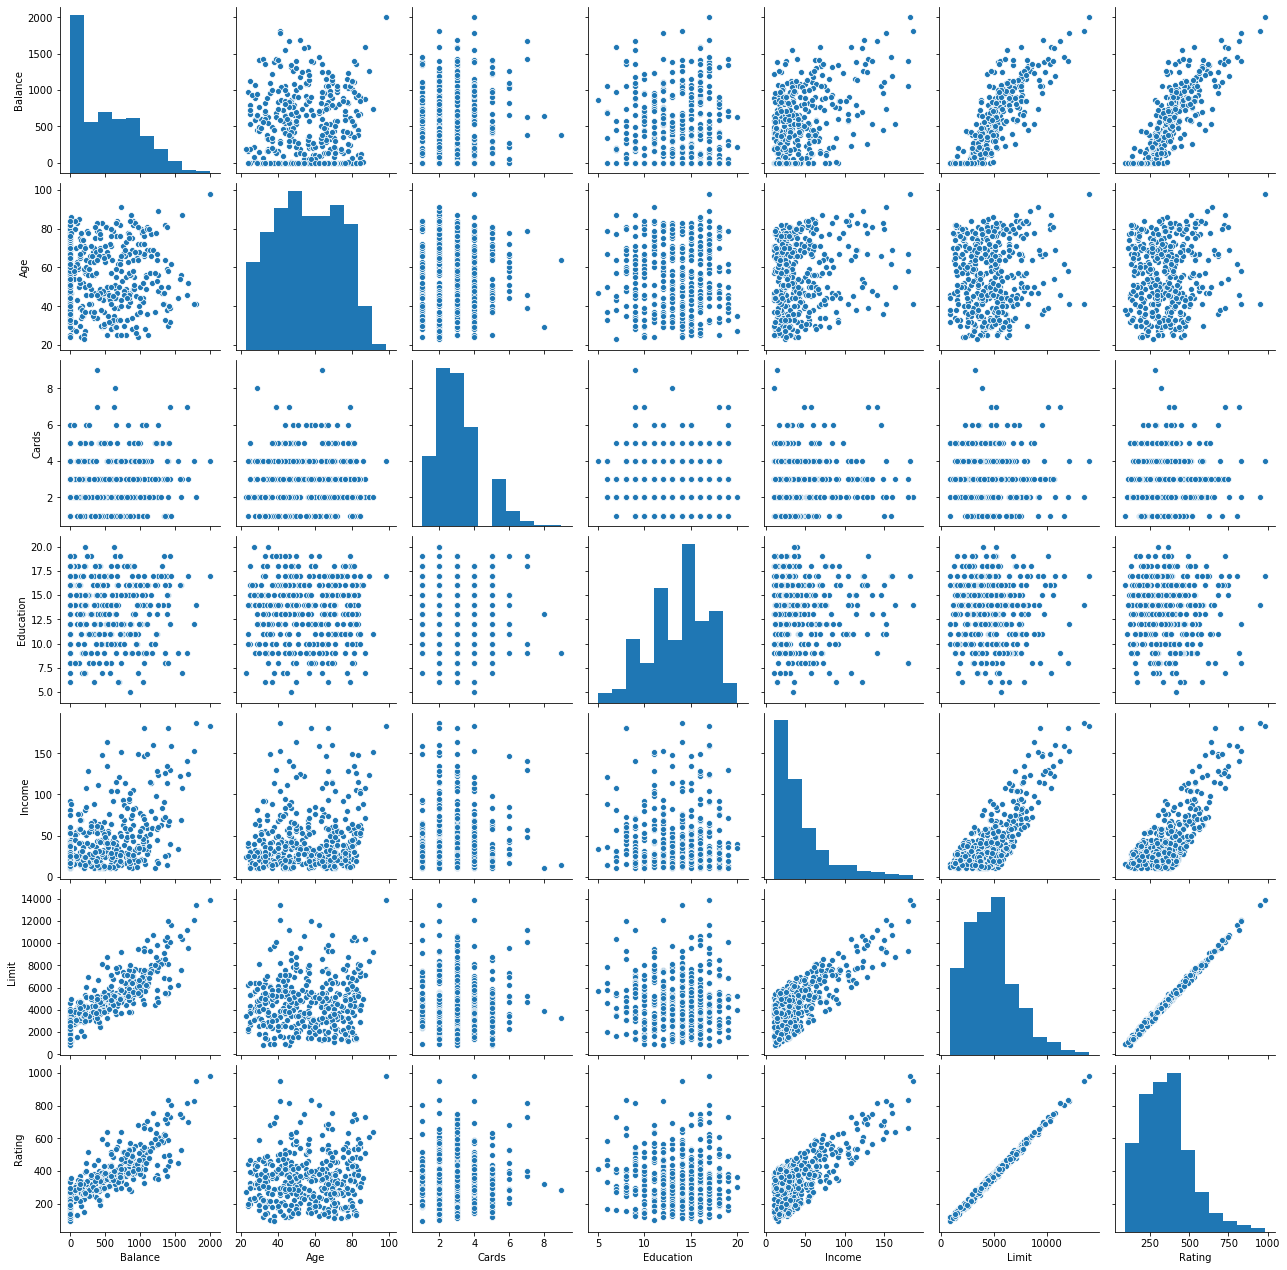

In [92]:
sns.pairplot(credit_DF[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']])

In [7]:
from statsmodels.formula import api as smf

In [38]:
stats = smf.ols('Balance ~ Gender', data=credit_DF).fit()

In [39]:
stats.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [41]:
smf.ols('Balance ~ Ethnicity', data=credit_DF).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [51]:
smf.ols('Sales ~ Radio + TV + TV*Radio', data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV,0.0191,0.002,12.699,0.000,0.016,0.022
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [46]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [52]:
credit_DF

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [113]:
data = credit_DF[['Income', 'Student']]
data.Student = data.Student.map({'No':0, 'Yes':1})
data['interactio_terms'] = data.Income * data.Student

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
data

,Income,Student,interactio_terms
0,14.891,0,0.000
1,106.025,1,106.025
2,104.593,0,0.000
3,148.924,0,0.000
4,55.882,0,0.000
...,...,...,...
395,12.096,0,0.000
396,13.364,0,0.000
397,57.872,0,0.000
398,37.728,0,0.000


In [115]:
processed_student = credit_DF.Student.map({'No': 0, 'Yes':1})

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [135]:
poly = PolynomialFeatures(degree=10)
X = poly.fit_transform(data.iloc[:, :2])

In [136]:
reg = LinearRegression()

In [140]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
reg.coef_

array([-9.22199894e-09, -1.54893626e-07, -1.46874398e-09, -3.77745948e-10,
        2.22482727e-11,  2.88738521e-11,  5.31530180e-09,  1.60132988e-10,
       -3.33442701e-11, -3.91769710e-09,  1.74617219e-07, -1.97078640e-08,
        1.60254436e-10,  4.45737564e-12,  1.23535287e-13,  3.88341496e-06,
        1.47315787e-07,  5.33555824e-09,  1.60254436e-10,  4.45737564e-12,
        1.23535287e-13, -1.36188950e-07,  2.57950185e-06,  1.47315787e-07,
        5.33555824e-09,  1.60254436e-10,  4.45737564e-12,  1.23535287e-13,
        1.92228281e-09, -1.03220036e-07,  2.57950185e-06,  1.47315787e-07,
        5.33555824e-09,  1.60254436e-10,  4.45737564e-12,  1.23535287e-13,
       -1.34862381e-11,  1.62470904e-09, -1.03220036e-07,  2.57950185e-06,
        1.47315787e-07,  5.33555824e-09,  1.60254436e-10,  4.45737564e-12,
        1.23535287e-13,  4.67713514e-14, -8.60680491e-12,  1.62473110e-09,
       -1.03220036e-07,  2.57950185e-06,  1.47315787e-07,  5.33555824e-09,
        1.60254436e-10,  

In [128]:
y = credit_DF.iloc[:, -1]

In [129]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [142]:
from sklearn.metrics import mean_squared_error
mean_squared_error(credit_DF.iloc[:, -1], reg.predict(X))

153153.13349302445

In [143]:
reg.coef_

array([-9.22199894e-09, -1.54893626e-07, -1.46874398e-09, -3.77745948e-10,
        2.22482727e-11,  2.88738521e-11,  5.31530180e-09,  1.60132988e-10,
       -3.33442701e-11, -3.91769710e-09,  1.74617219e-07, -1.97078640e-08,
        1.60254436e-10,  4.45737564e-12,  1.23535287e-13,  3.88341496e-06,
        1.47315787e-07,  5.33555824e-09,  1.60254436e-10,  4.45737564e-12,
        1.23535287e-13, -1.36188950e-07,  2.57950185e-06,  1.47315787e-07,
        5.33555824e-09,  1.60254436e-10,  4.45737564e-12,  1.23535287e-13,
        1.92228281e-09, -1.03220036e-07,  2.57950185e-06,  1.47315787e-07,
        5.33555824e-09,  1.60254436e-10,  4.45737564e-12,  1.23535287e-13,
       -1.34862381e-11,  1.62470904e-09, -1.03220036e-07,  2.57950185e-06,
        1.47315787e-07,  5.33555824e-09,  1.60254436e-10,  4.45737564e-12,
        1.23535287e-13,  4.67713514e-14, -8.60680491e-12,  1.62473110e-09,
       -1.03220036e-07,  2.57950185e-06,  1.47315787e-07,  5.33555824e-09,
        1.60254436e-10,  

In [144]:
reg.score(X, y)

0.2736386366803145

In [121]:
credit_DF.Student.shape

(400,)

In [122]:
income = np.linspace(0, 150, 1)

ValueError: Expected 2D array, got 1D array instead:
array=[0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

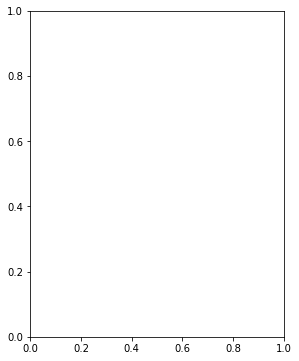

In [123]:
plt.figure(figsize=(10,6))
ax = plt.subplot(121)
ax.plot(income, reg.predict(income))

### Non Linear Relationship

In [3]:
df = pd.read_csv('Auto.csv')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [80]:
df['horsepower2'] = df.horsepower**2

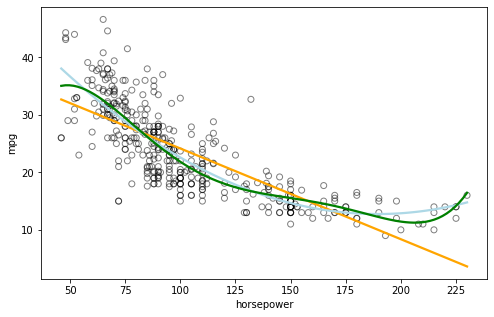

In [65]:
plt.figure(figsize=(8, 5))
plt.scatter(df.horsepower, df.mpg, facecolors='None', edgecolors='k', alpha=.5) 

sns.regplot(df.horsepower, df.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(df.horsepower, df.mpg, ci=None, label='2', order=2, scatter=False, color='lightblue')
sns.regplot(df.horsepower, df.mpg, ci=None, label='2', order=5, scatter=False, color='green')

plt.show()

In [81]:
smf.ols('mpg ~ horsepower + horsepower2', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 05 May 2020   Prob (F-statistic):           5.40e-99
Time:                        00:03:13   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Exercises

In [5]:
boston = pd.read_csv('Boston.csv')

In [6]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


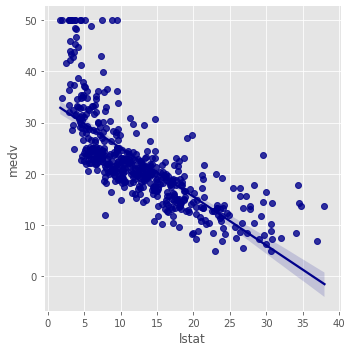

In [18]:
plt.style.use('ggplot')
sns.lmplot(x='lstat', y='medv', data=boston, scatter_kws={'color':'darkblue'}, line_kws={'color':'darkblue'})

In [34]:
a = smf.ols('medv ~ lstat', data=boston).fit()

In [36]:
a.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


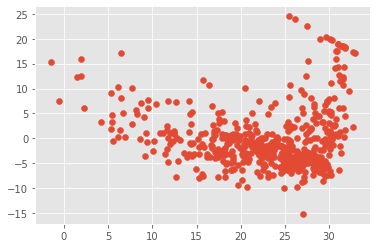

In [37]:
plt.scatter(a.fittedvalues, a.resid)

In [46]:
smf.ols('medv ~ {}'.format('+'.join(boston.columns[:-1])), data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        23:48:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
smf.ols('medv ~ {}'.format('+'.join(boston.columns[:-1].difference(['age']))), data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.08e-136
Time:                        23:52:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
smf.ols('medv ~ lstat * age', data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 14 May 2020   Prob (F-statistic):           4.86e-88
Time:                        23:56:16   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 14 May 2020   Prob (F-statistic):          1.56e-112
Time:                        23:57:51   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
result1 = smf.ols('medv ~ lstat', data=boston).fit()
result2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

In [66]:
from statsmodels.stats.anova import anova_lm

In [67]:
anova_lm(result1, result2)

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


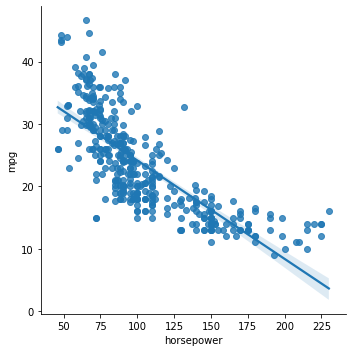

In [4]:
sns.lmplot('horsepower', 'mpg', data=df)

In [5]:
smf.ols('mpg ~ horsepower', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 16 May 2020   Prob (F-statistic):           7.03e-81
Time:                        23:37:31   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""